In [2]:
# Load packages and check versions
import sys
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib as mpl
import sklearn
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [3]:
df = pd.read_csv('../Data/Chapter_1_cleaned_data.csv')

In [4]:
df.shape

(26664, 30)

In [5]:
df['default payment next month'].mean()

0.2217971797179718

In [6]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

<h2>Introduction to Scikit-Learn</h2>

Just knowing the working process of LogisticRegression

In [7]:
#Import the class
from sklearn.linear_model import LogisticRegression
#Create an object
my_lr = LogisticRegression()
#Examine it
my_lr

LogisticRegression()

In [8]:
#Instantiate while specifying keyword arguments
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
#5/2020: updated multi_class='warn' to multi_class='auto'

In [9]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'

In [10]:
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [11]:
X = df['EDUCATION'][0:10].values.reshape(-1,1) #0-9 values of education into x 
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [12]:
y = df['default payment next month'][0:10].values #0-9 values of default into y
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
my_new_lr.fit(X, y) 

LogisticRegression(C=0.1, solver='liblinear')

In [14]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1) #10-19 values for testing into new_x var
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [15]:
my_new_lr.predict(new_X) #predicting the values for the giving new_x values and result of prediction
#LogisticRegression is just to find yes or no

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
df['default payment next month'][10:20].values #actual values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

<h2>Generating Synthetic Data</h2>

In [17]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [18]:
type(X)

numpy.ndarray

<h2>Data for a Linear Regression</h2>

Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting

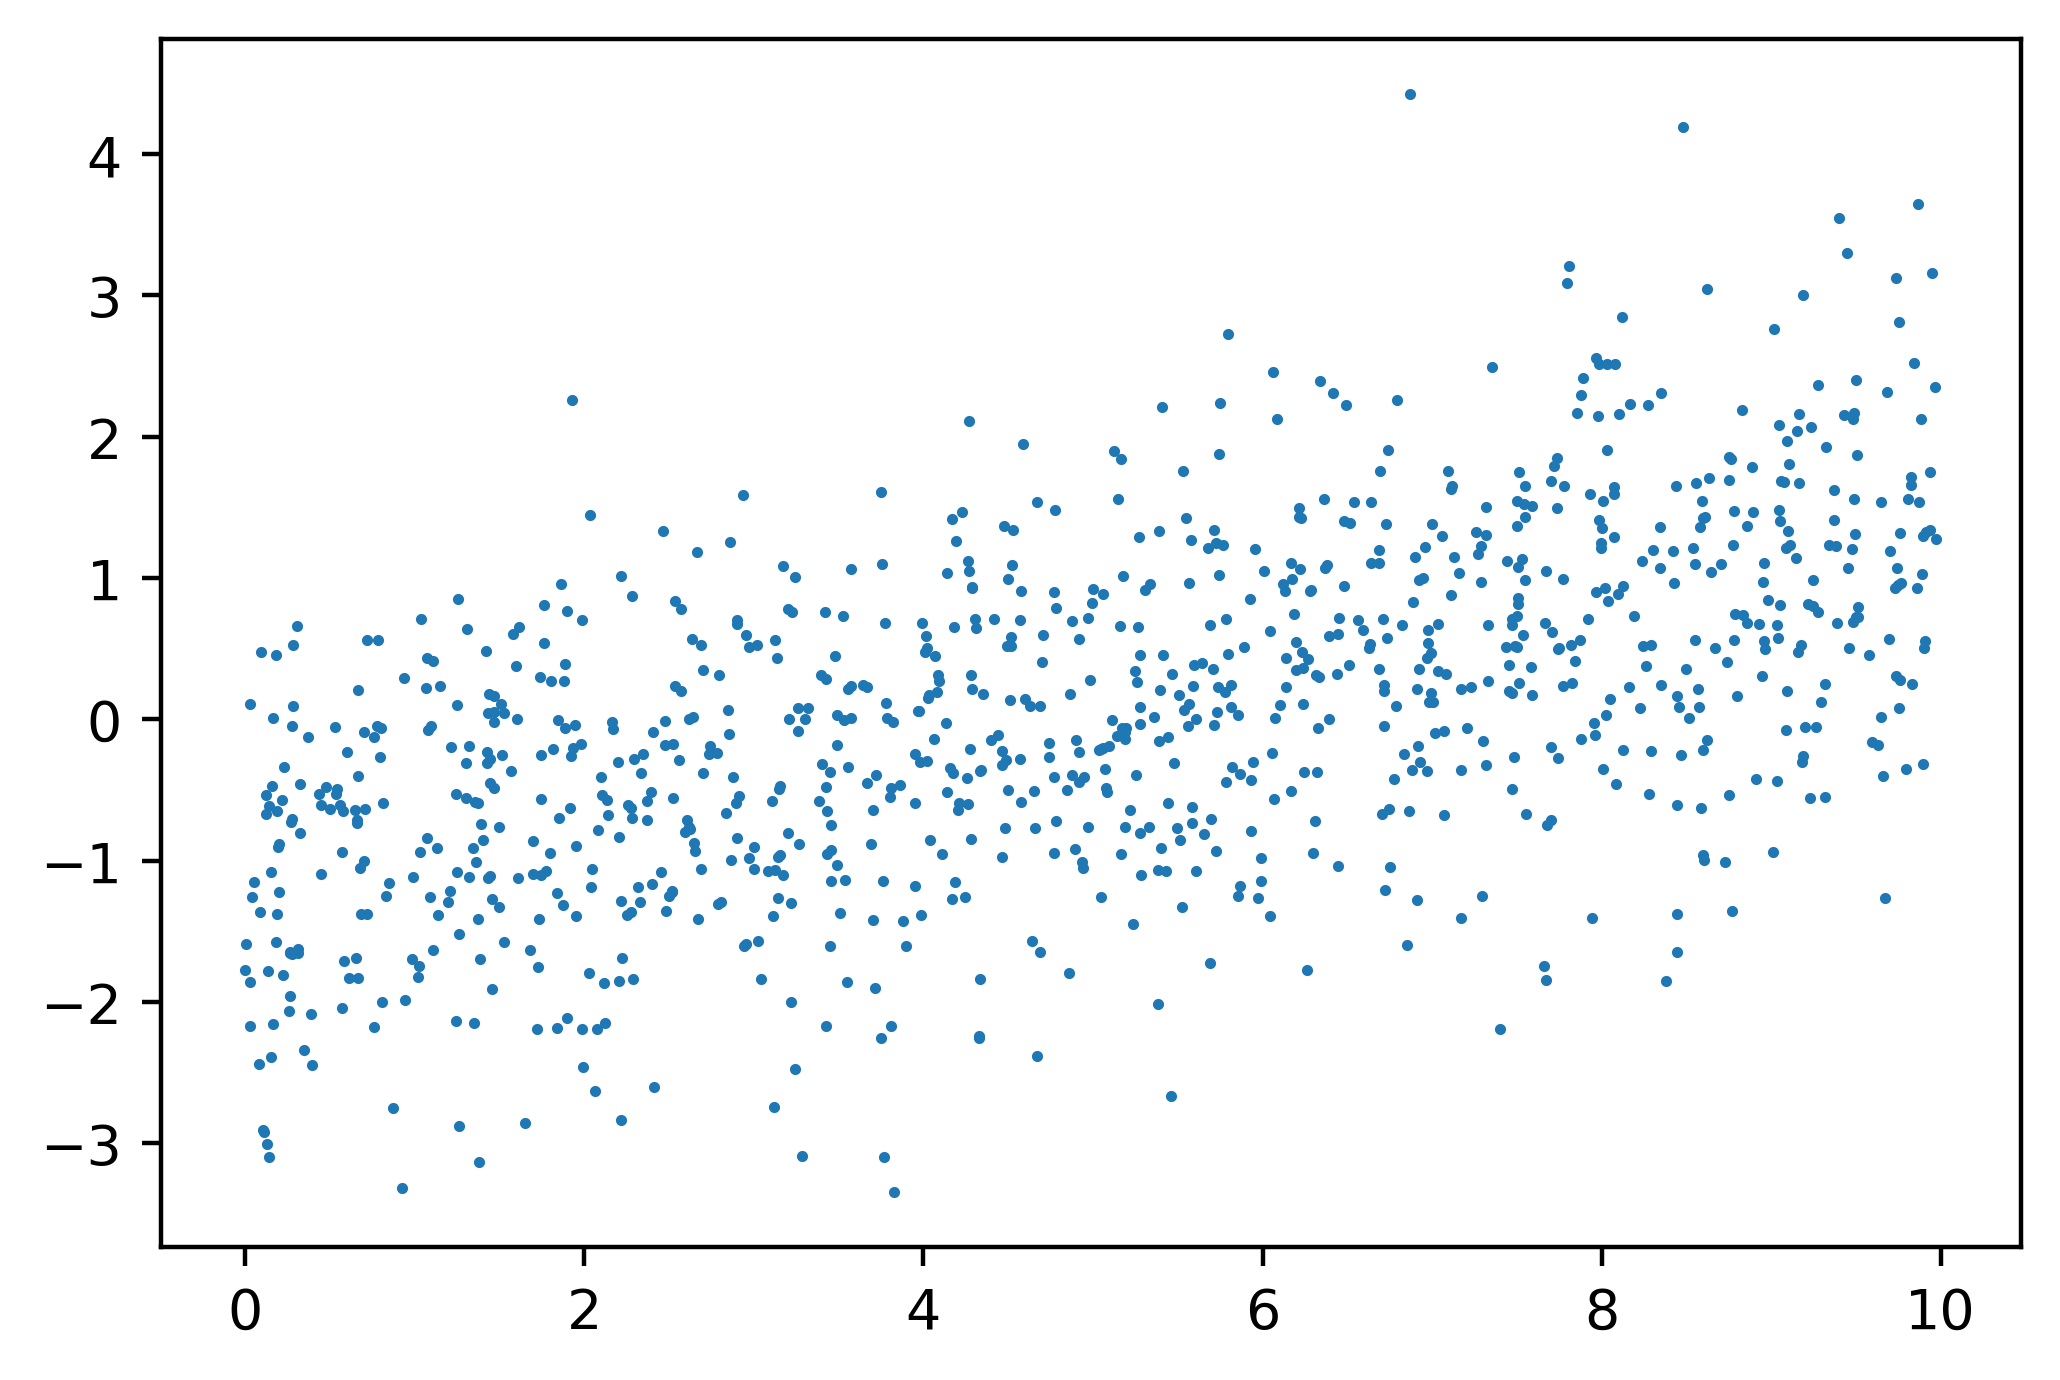

In [19]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept
mpl.rcParams['figure.dpi'] = 400
plt.scatter(X,y,s=1)

<h2>Exercise 8: Linear regression in Scikit-Learn</h2>

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [21]:
lin_reg.fit(X.reshape(-1,1), y)

LinearRegression()

In [22]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


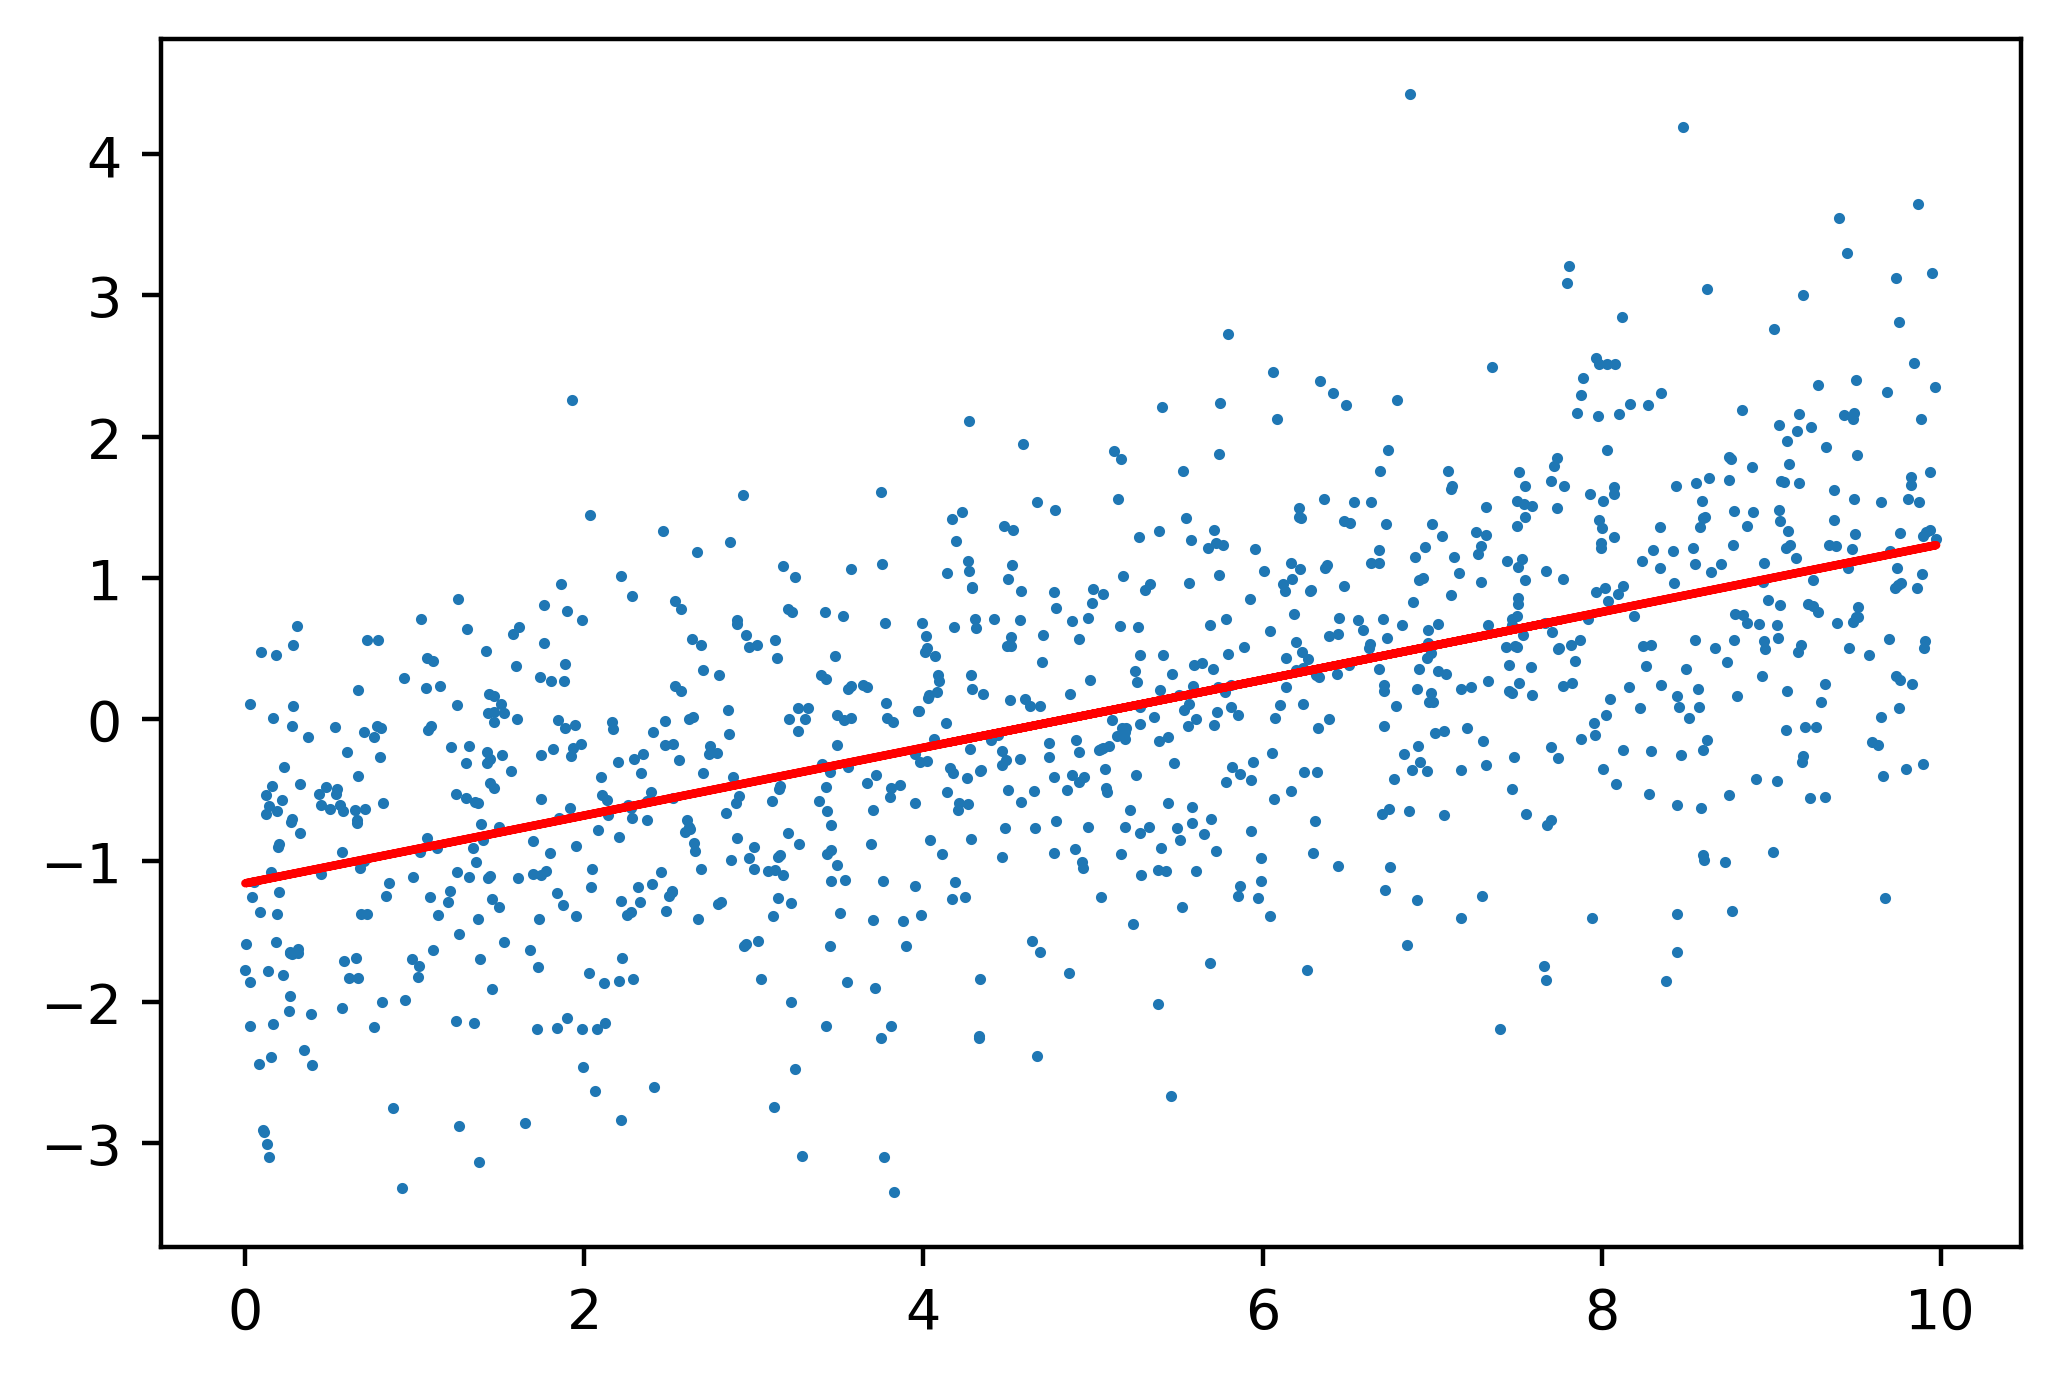

In [23]:
y_pred = lin_reg.predict(X.reshape(-1,1))
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

<h2>Model performance metrics for binary classification</h2>

Binary classification refers to those classification tasks that have two class labels. Examples include: Email spam detection (spam or not)

<h3>Splitting the data: training and testing sets</h3>
Split the data in to training (80%) and testing (20%). Introduce metrics using testing scores.

In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

#here two labels are EDUCATION & DEFAULT, So now these are divided into training(80%) and testing(20%) 

NameError: name 'df' is not defined

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#values of no of rows in respective variables

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [26]:
np.mean(y_train) #mean of y_train var

0.223102526838873

In [27]:
np.mean(y_test) #mean of y_train var

0.21657603600225014

<h2>Classification accuracy</h2>

now we will fit this data into LogisticRegression for predicting


In [28]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
#5/2020: updated multi_class='warn' to multi_class='auto'

In [29]:
example_lr.fit(X_train, y_train) #training the data

LogisticRegression(C=0.1, solver='liblinear')

In [30]:
y_pred = example_lr.predict(X_test) #predicting using testing values



<b>Accuracy</b>

In [31]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [32]:
example_lr.score(X_test, y_test) #prediction accuracy

0.7834239639977498

In [33]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

<h2>Exercise 9: Calculating the True and False Positive and Negative Rates and Confusion Matrix in Python</h2>

In [3]:
#P-positive N-negative
#TP-truepositive FN-falsenegative
#TPR- truepositive rate FNR- falsenegative rate.

P = sum(y_test)
P

NameError: name 'y_test' is not defined

In [35]:
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

In [36]:
TPR = TP/P
TPR

0.0

In [37]:
FN = sum( (y_test==1) & (y_pred==0) )
FN

1155

In [38]:
FNR = FN/P
FNR

1.0

In [39]:
N = sum(y_test==0)
N

4178

In [40]:
TN = sum( (y_test==0) & (y_pred==0))
TN

4178

In [41]:
FP = sum( (y_test==0) & (y_pred==1))
FP

0

In [42]:
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [43]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

<h1>Exercise 10: Obtaining Predicted Probabilities from a Trained Logistic Regression Model</h1>

In [44]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [45]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [46]:
prob_sum.shape

(5333,)

In [47]:
np.unique(prob_sum)

array([1.])

In [48]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

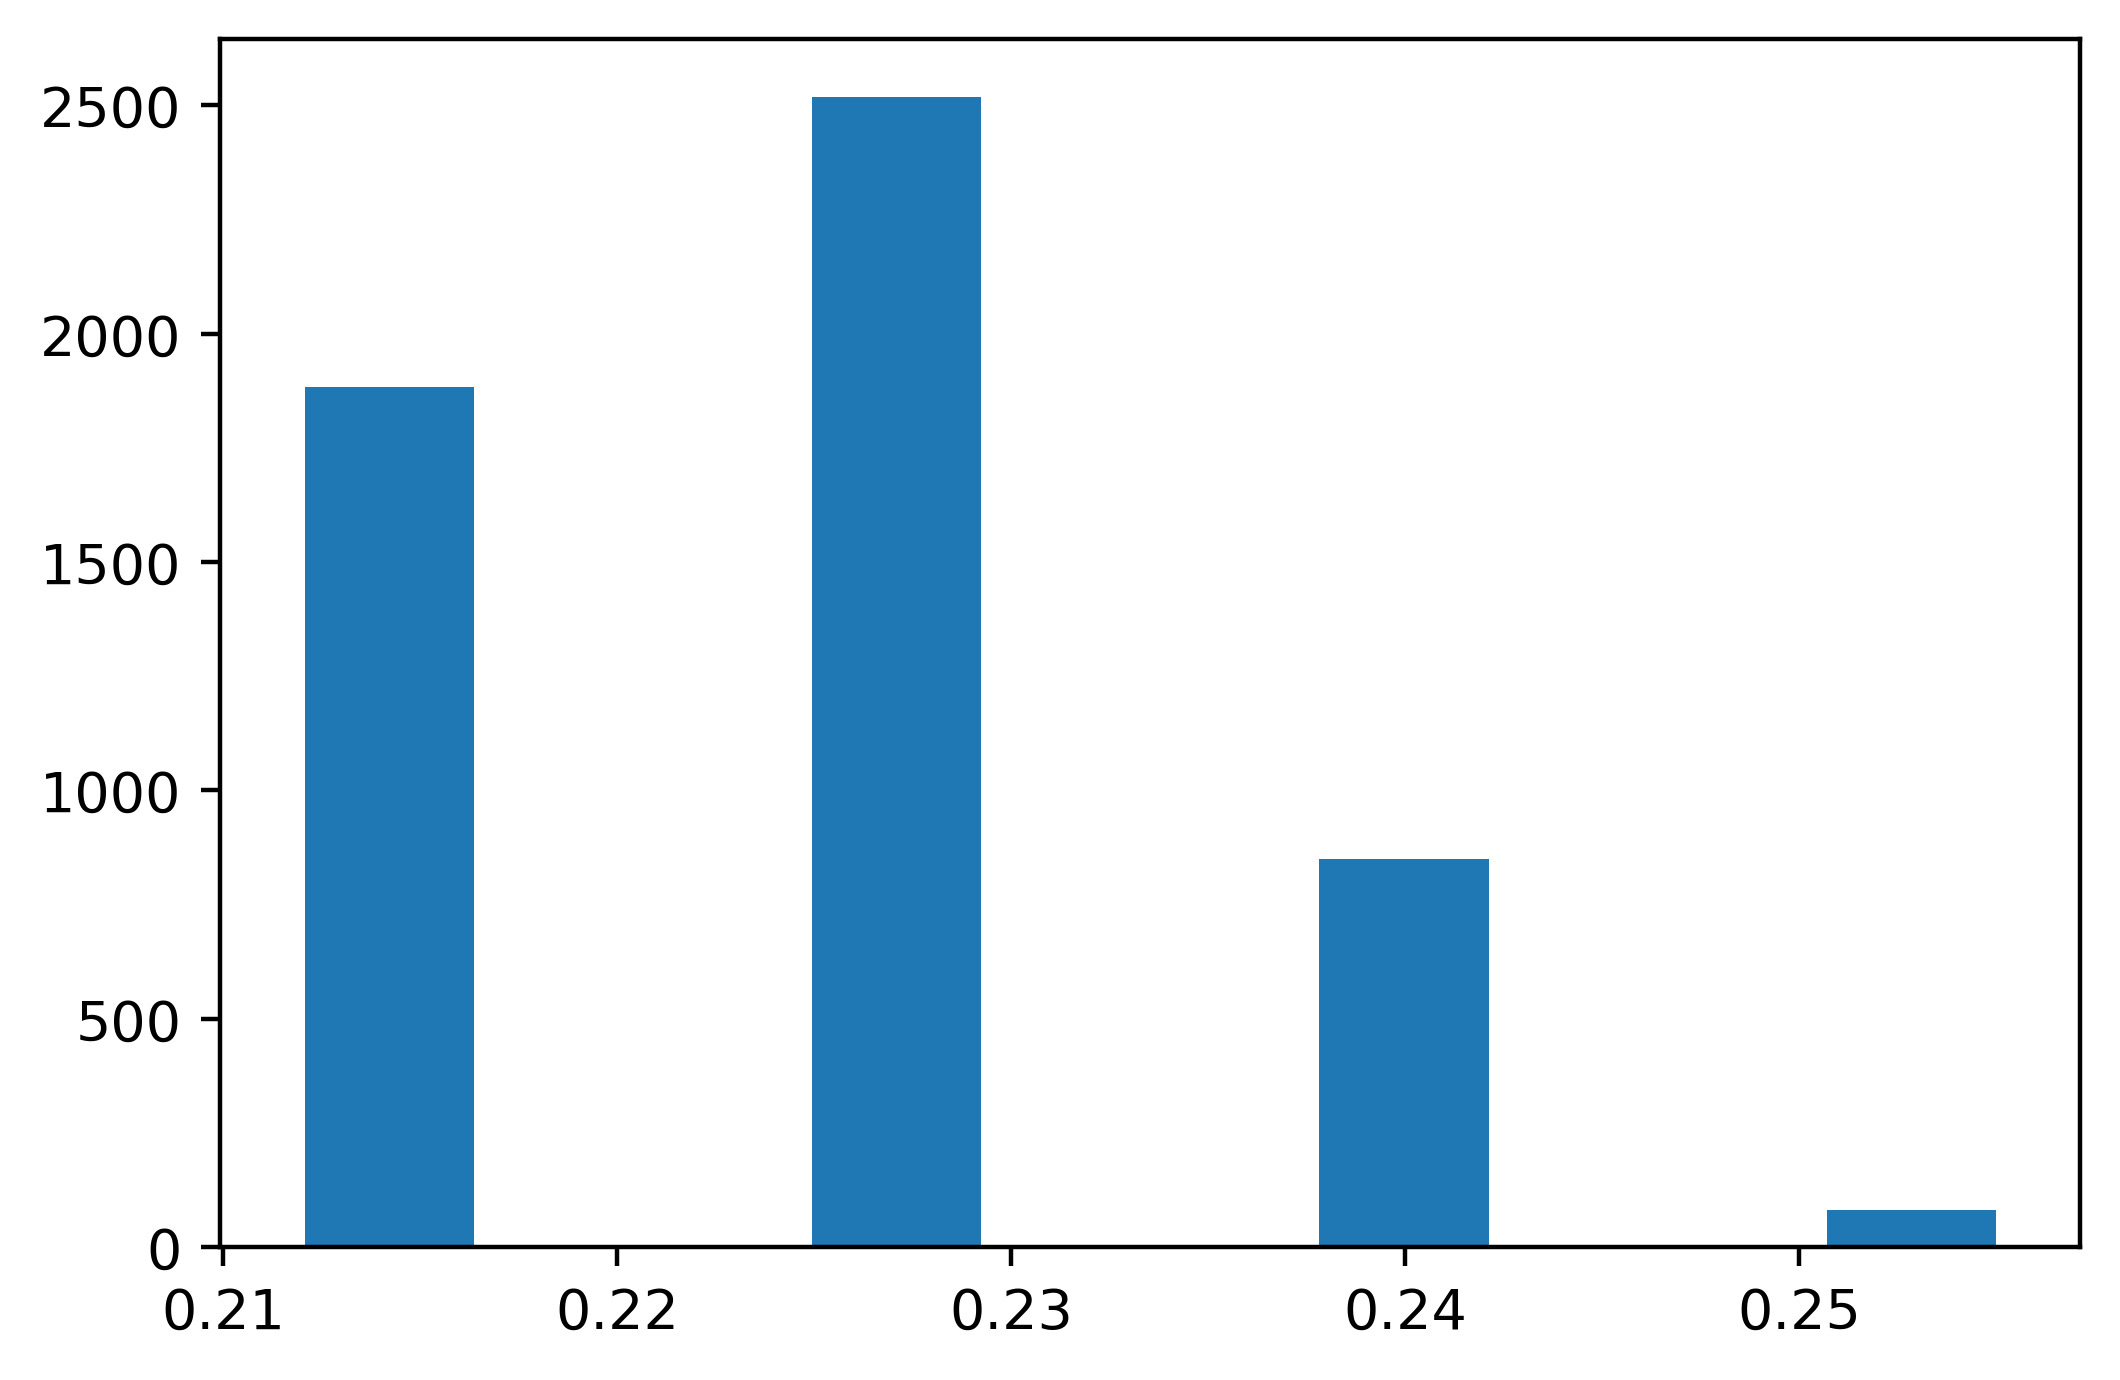

In [49]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

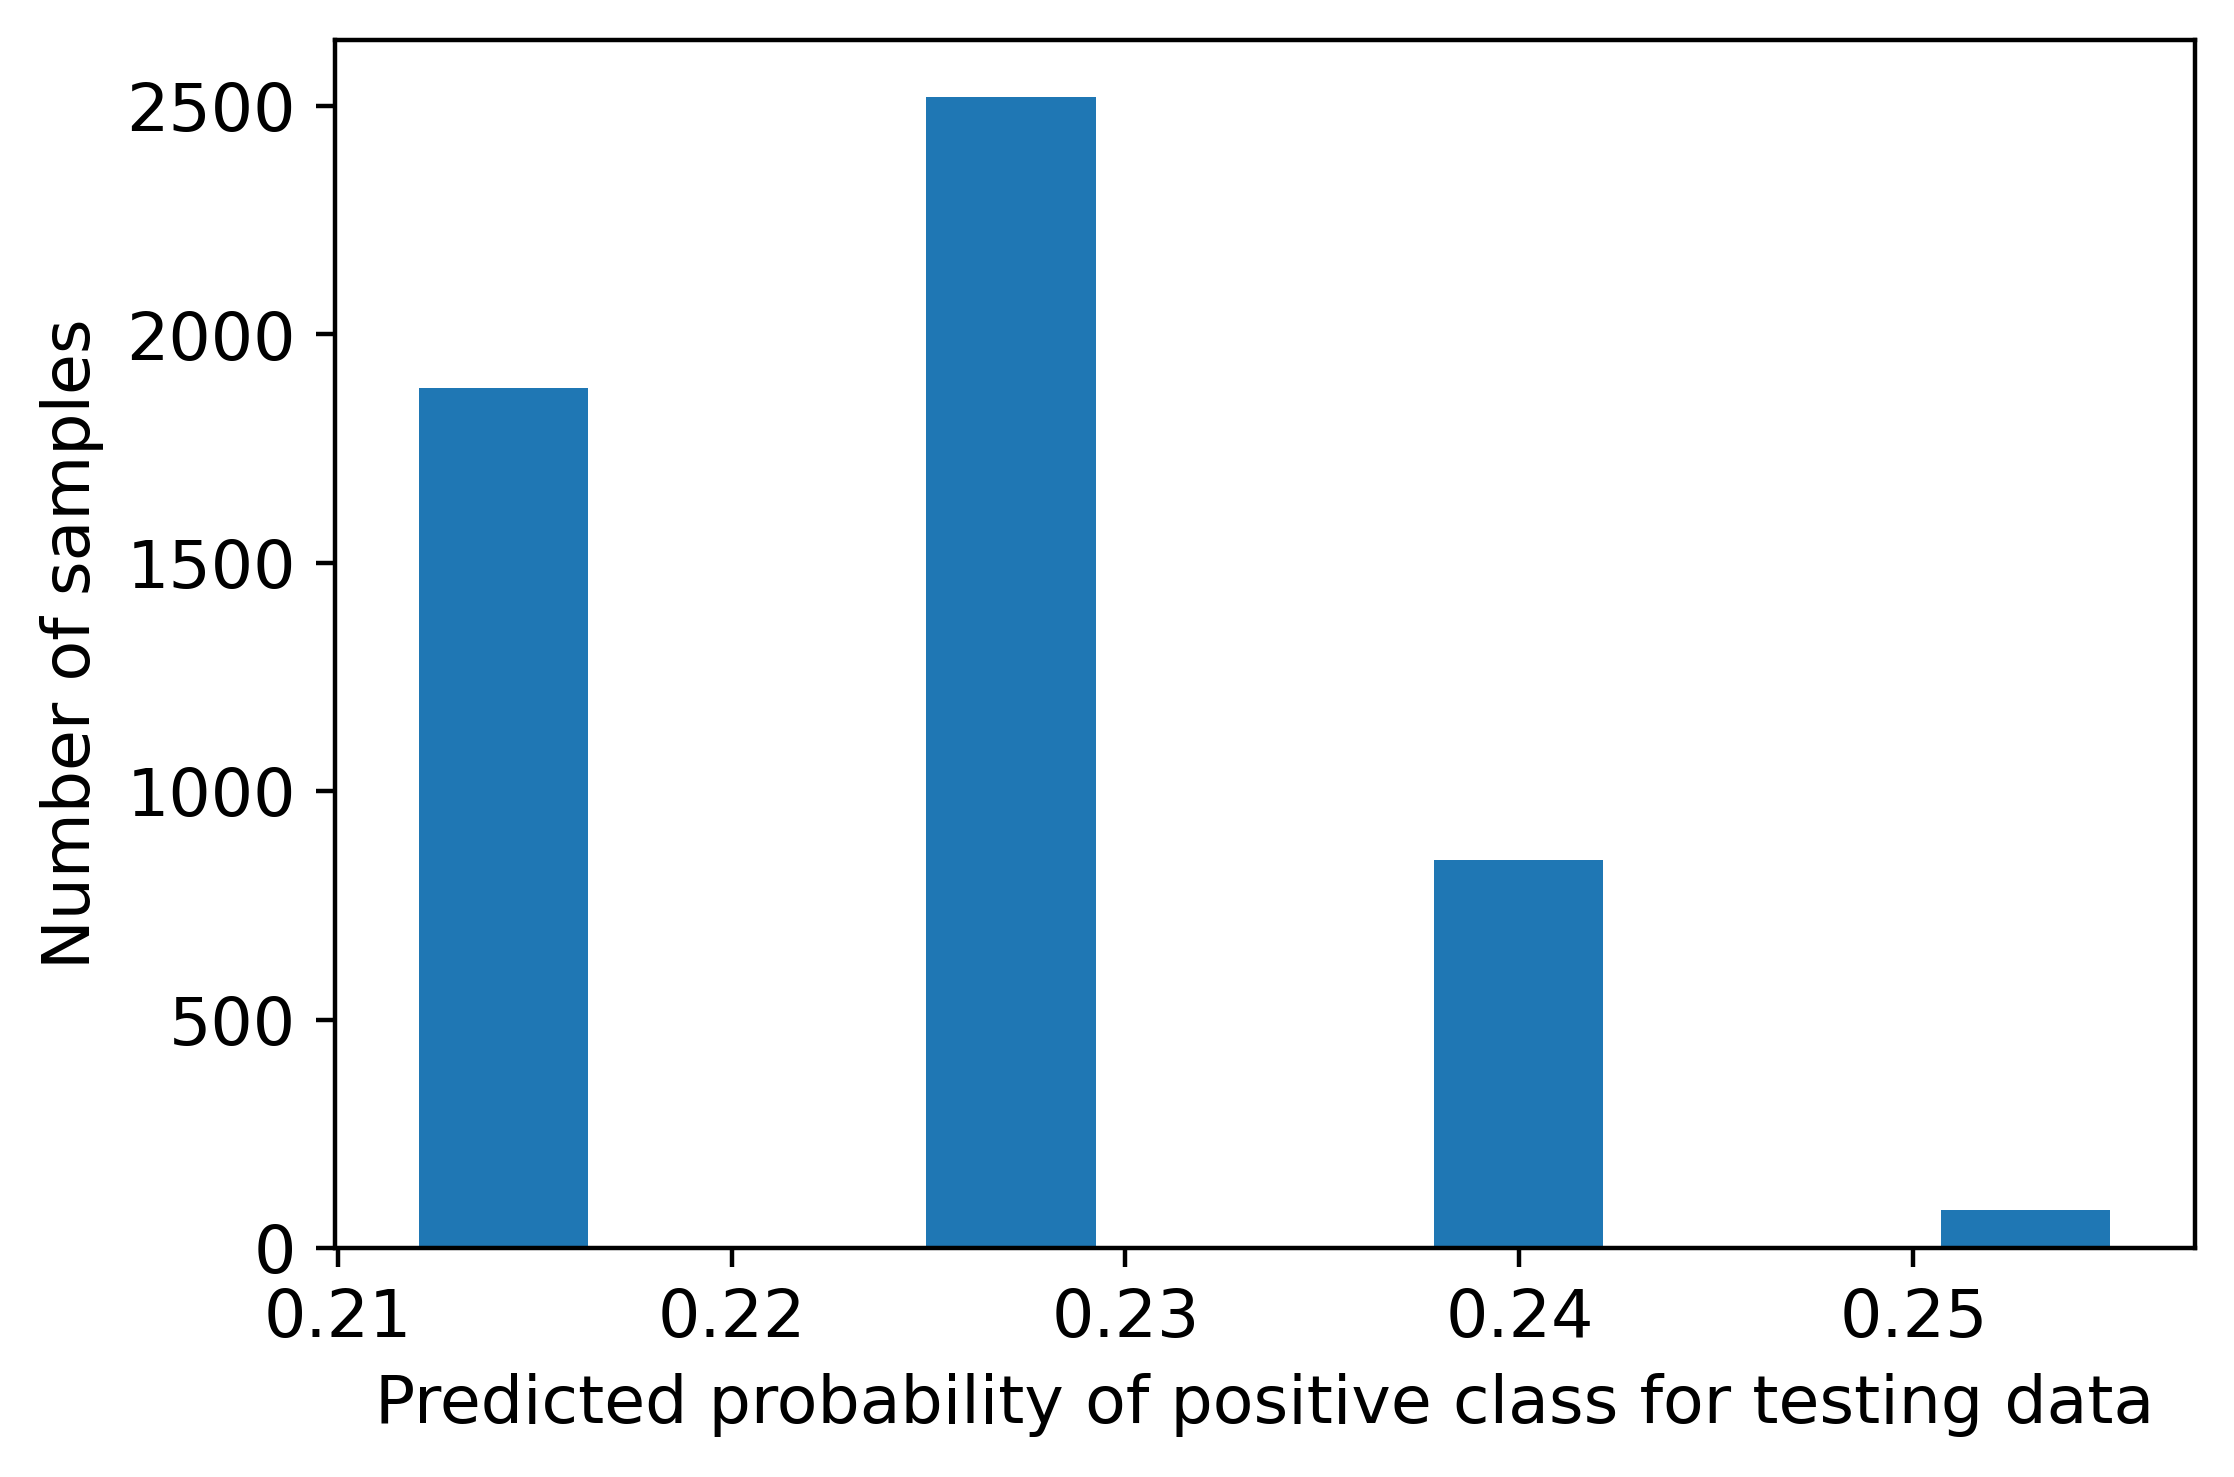

In [50]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [51]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

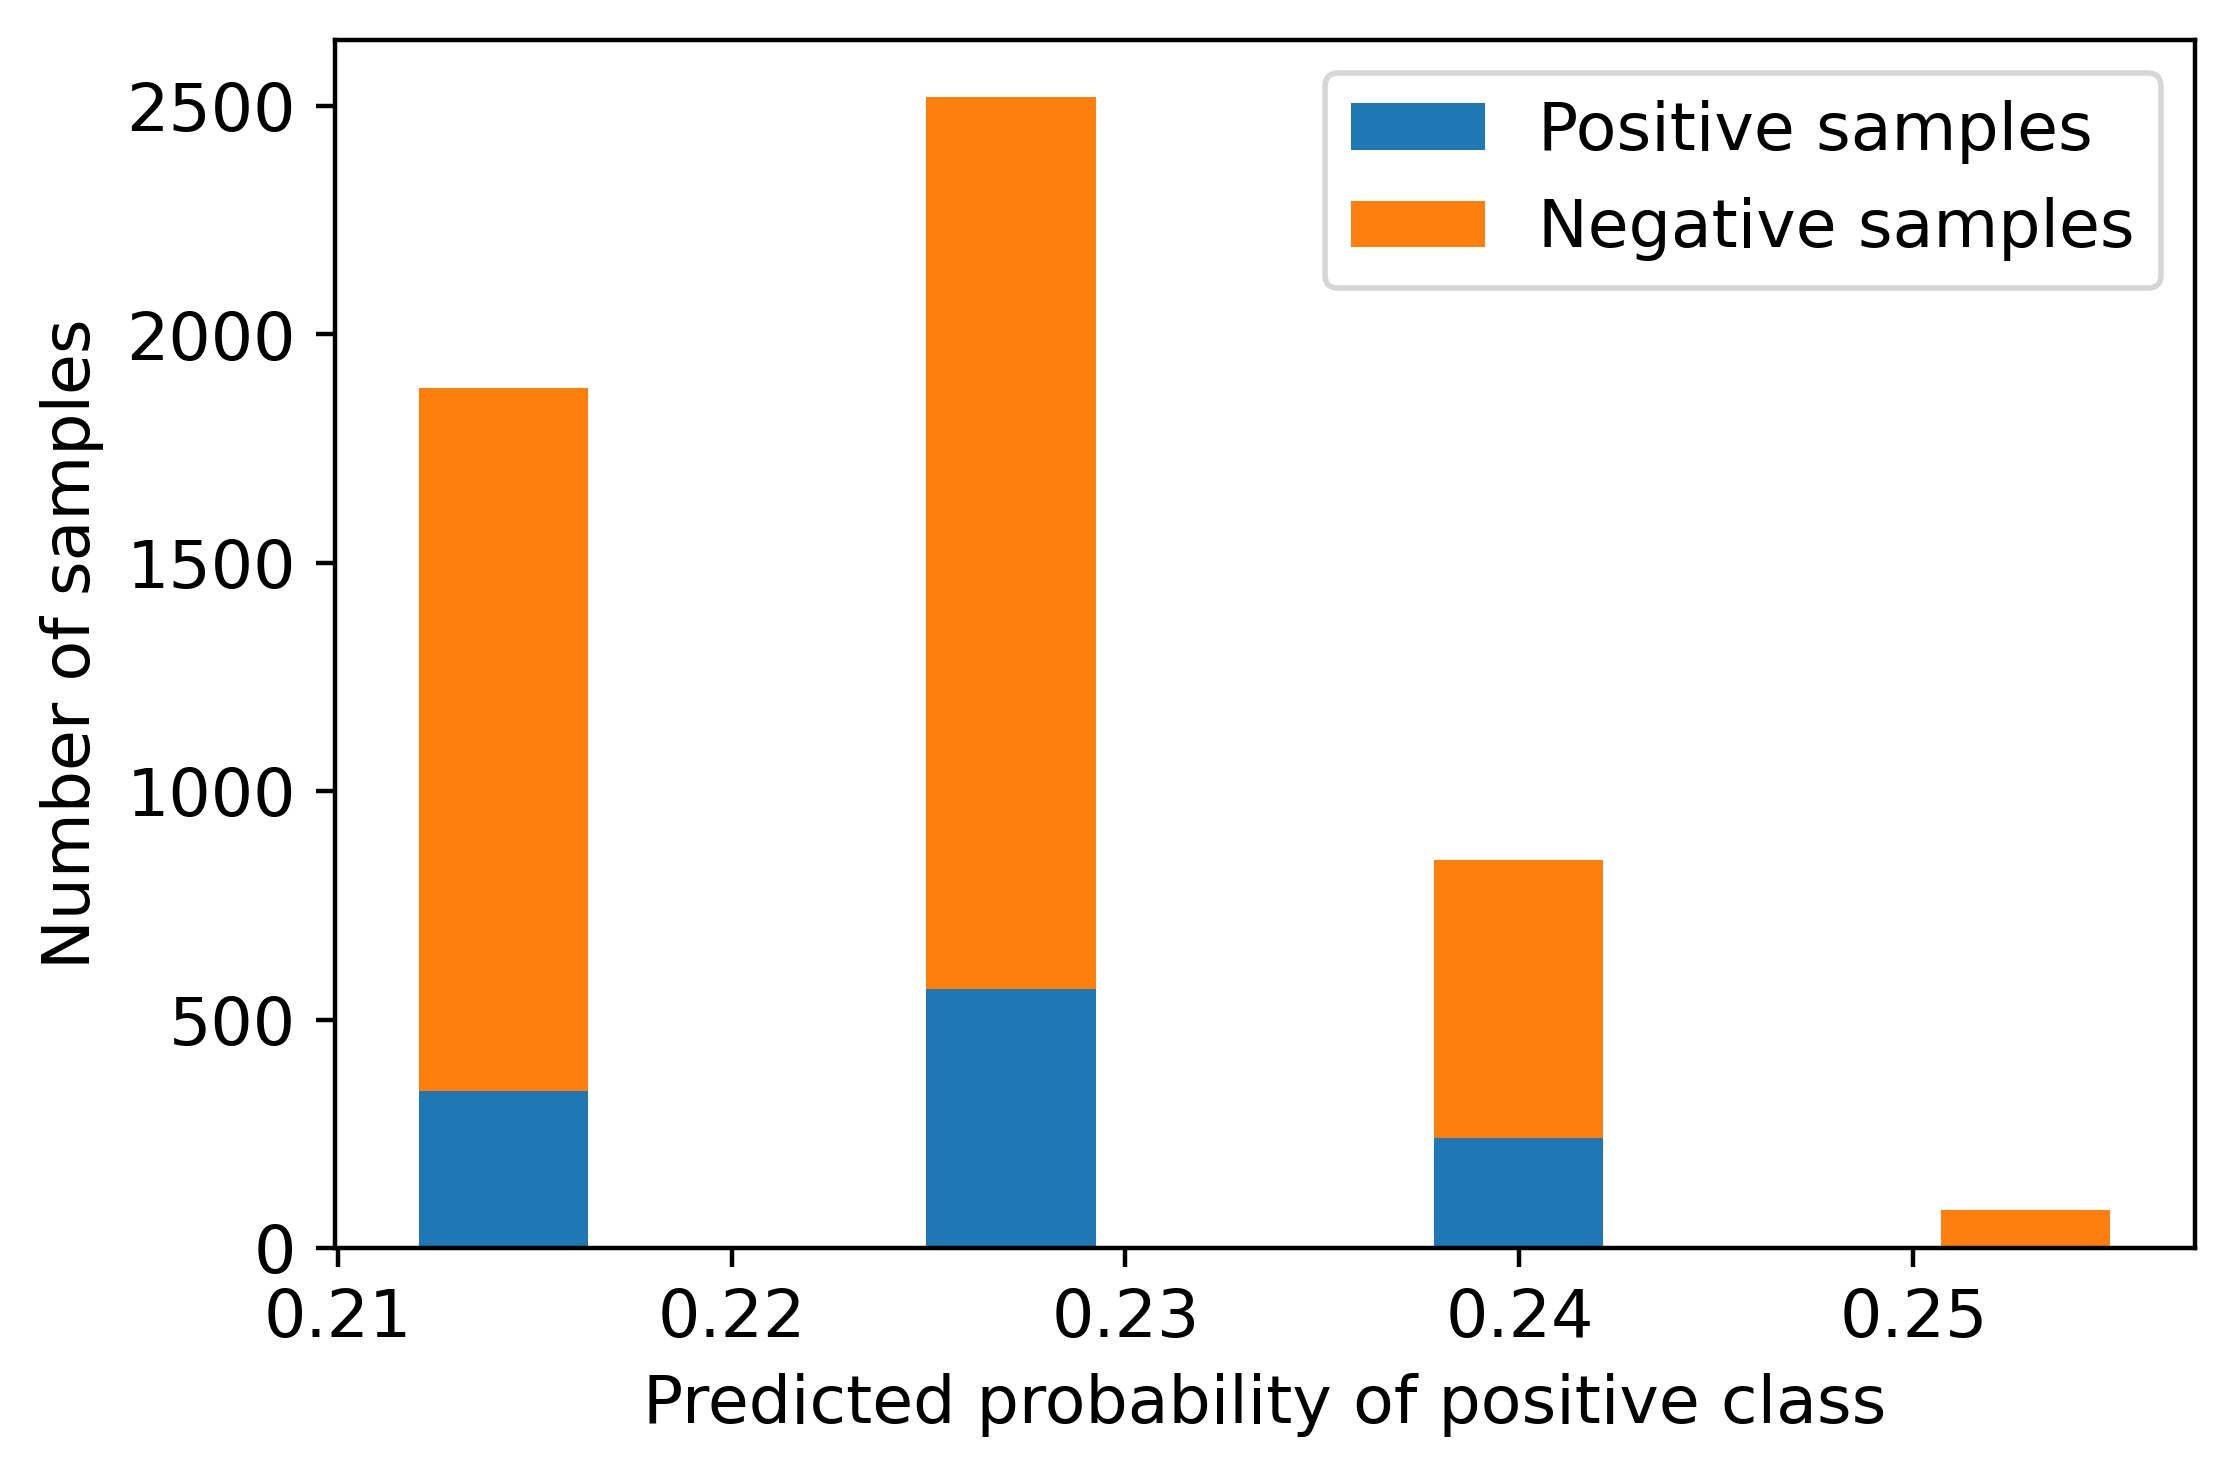

In [52]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

<h1>The Receiver Operating Characteristic (ROC) curve</h1>

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

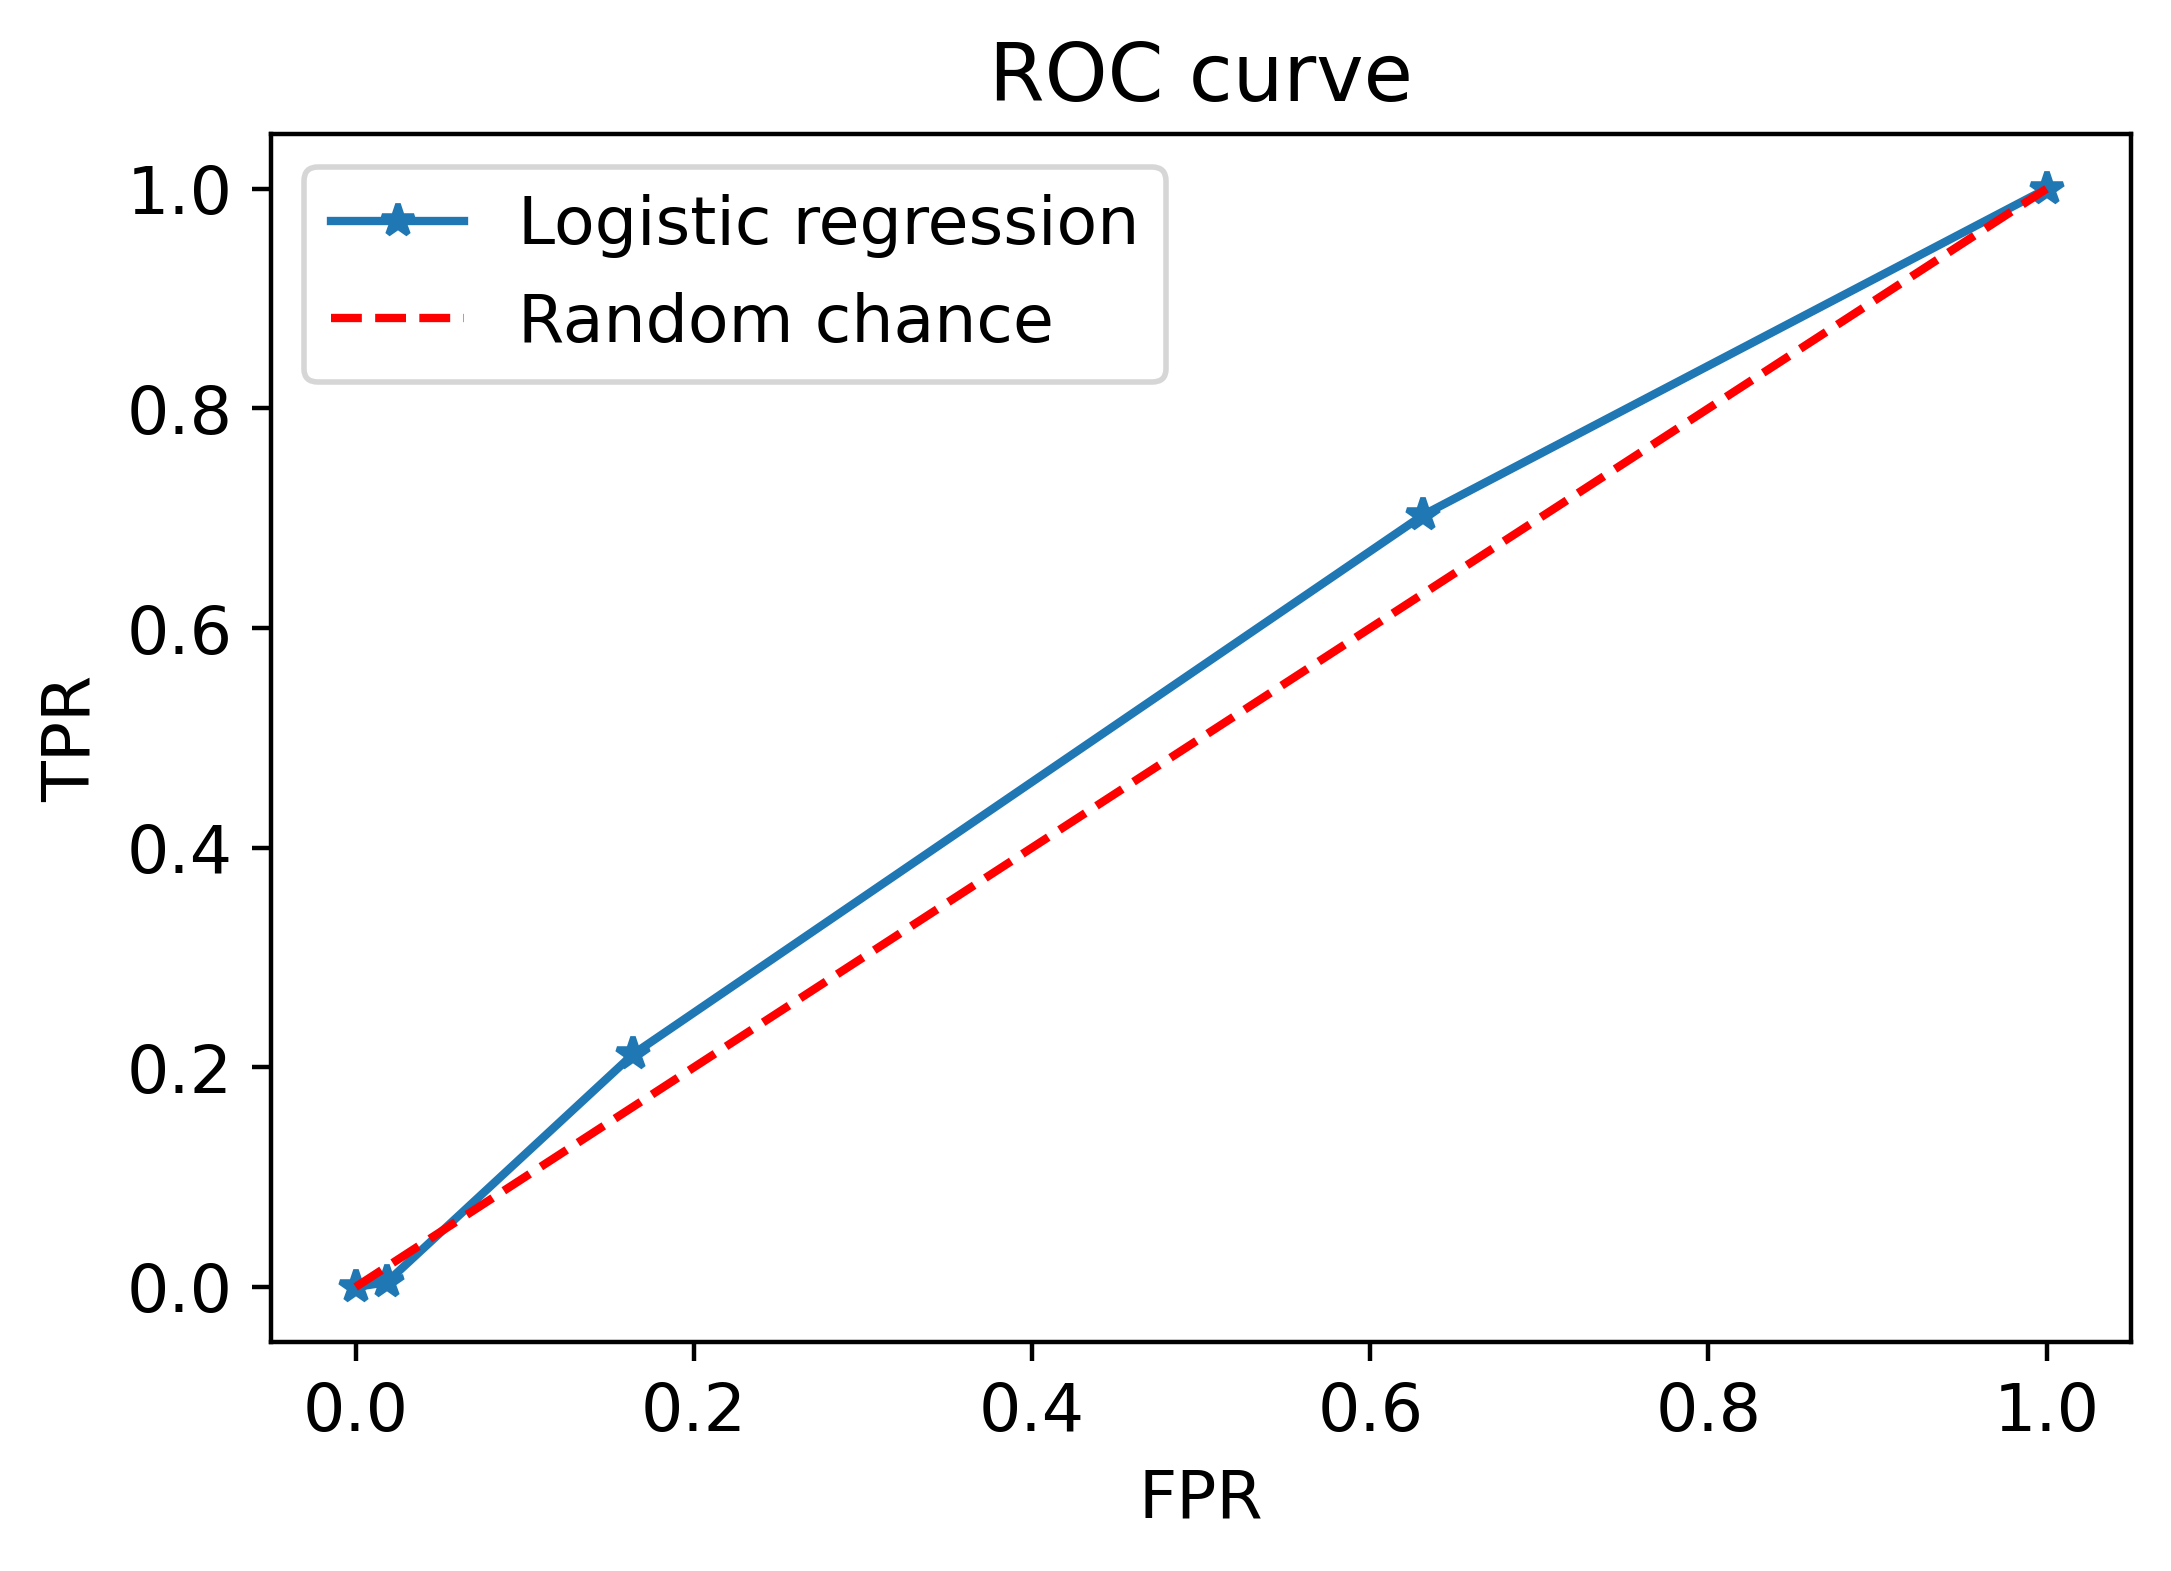

In [54]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [55]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [56]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

<h1>Activity 2: Performing Logistic Regression with a New Feature and Creating a Precision-Recall Curve</h1>

In [57]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [58]:
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

In [59]:
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [60]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

0.6201990844642832

In [61]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

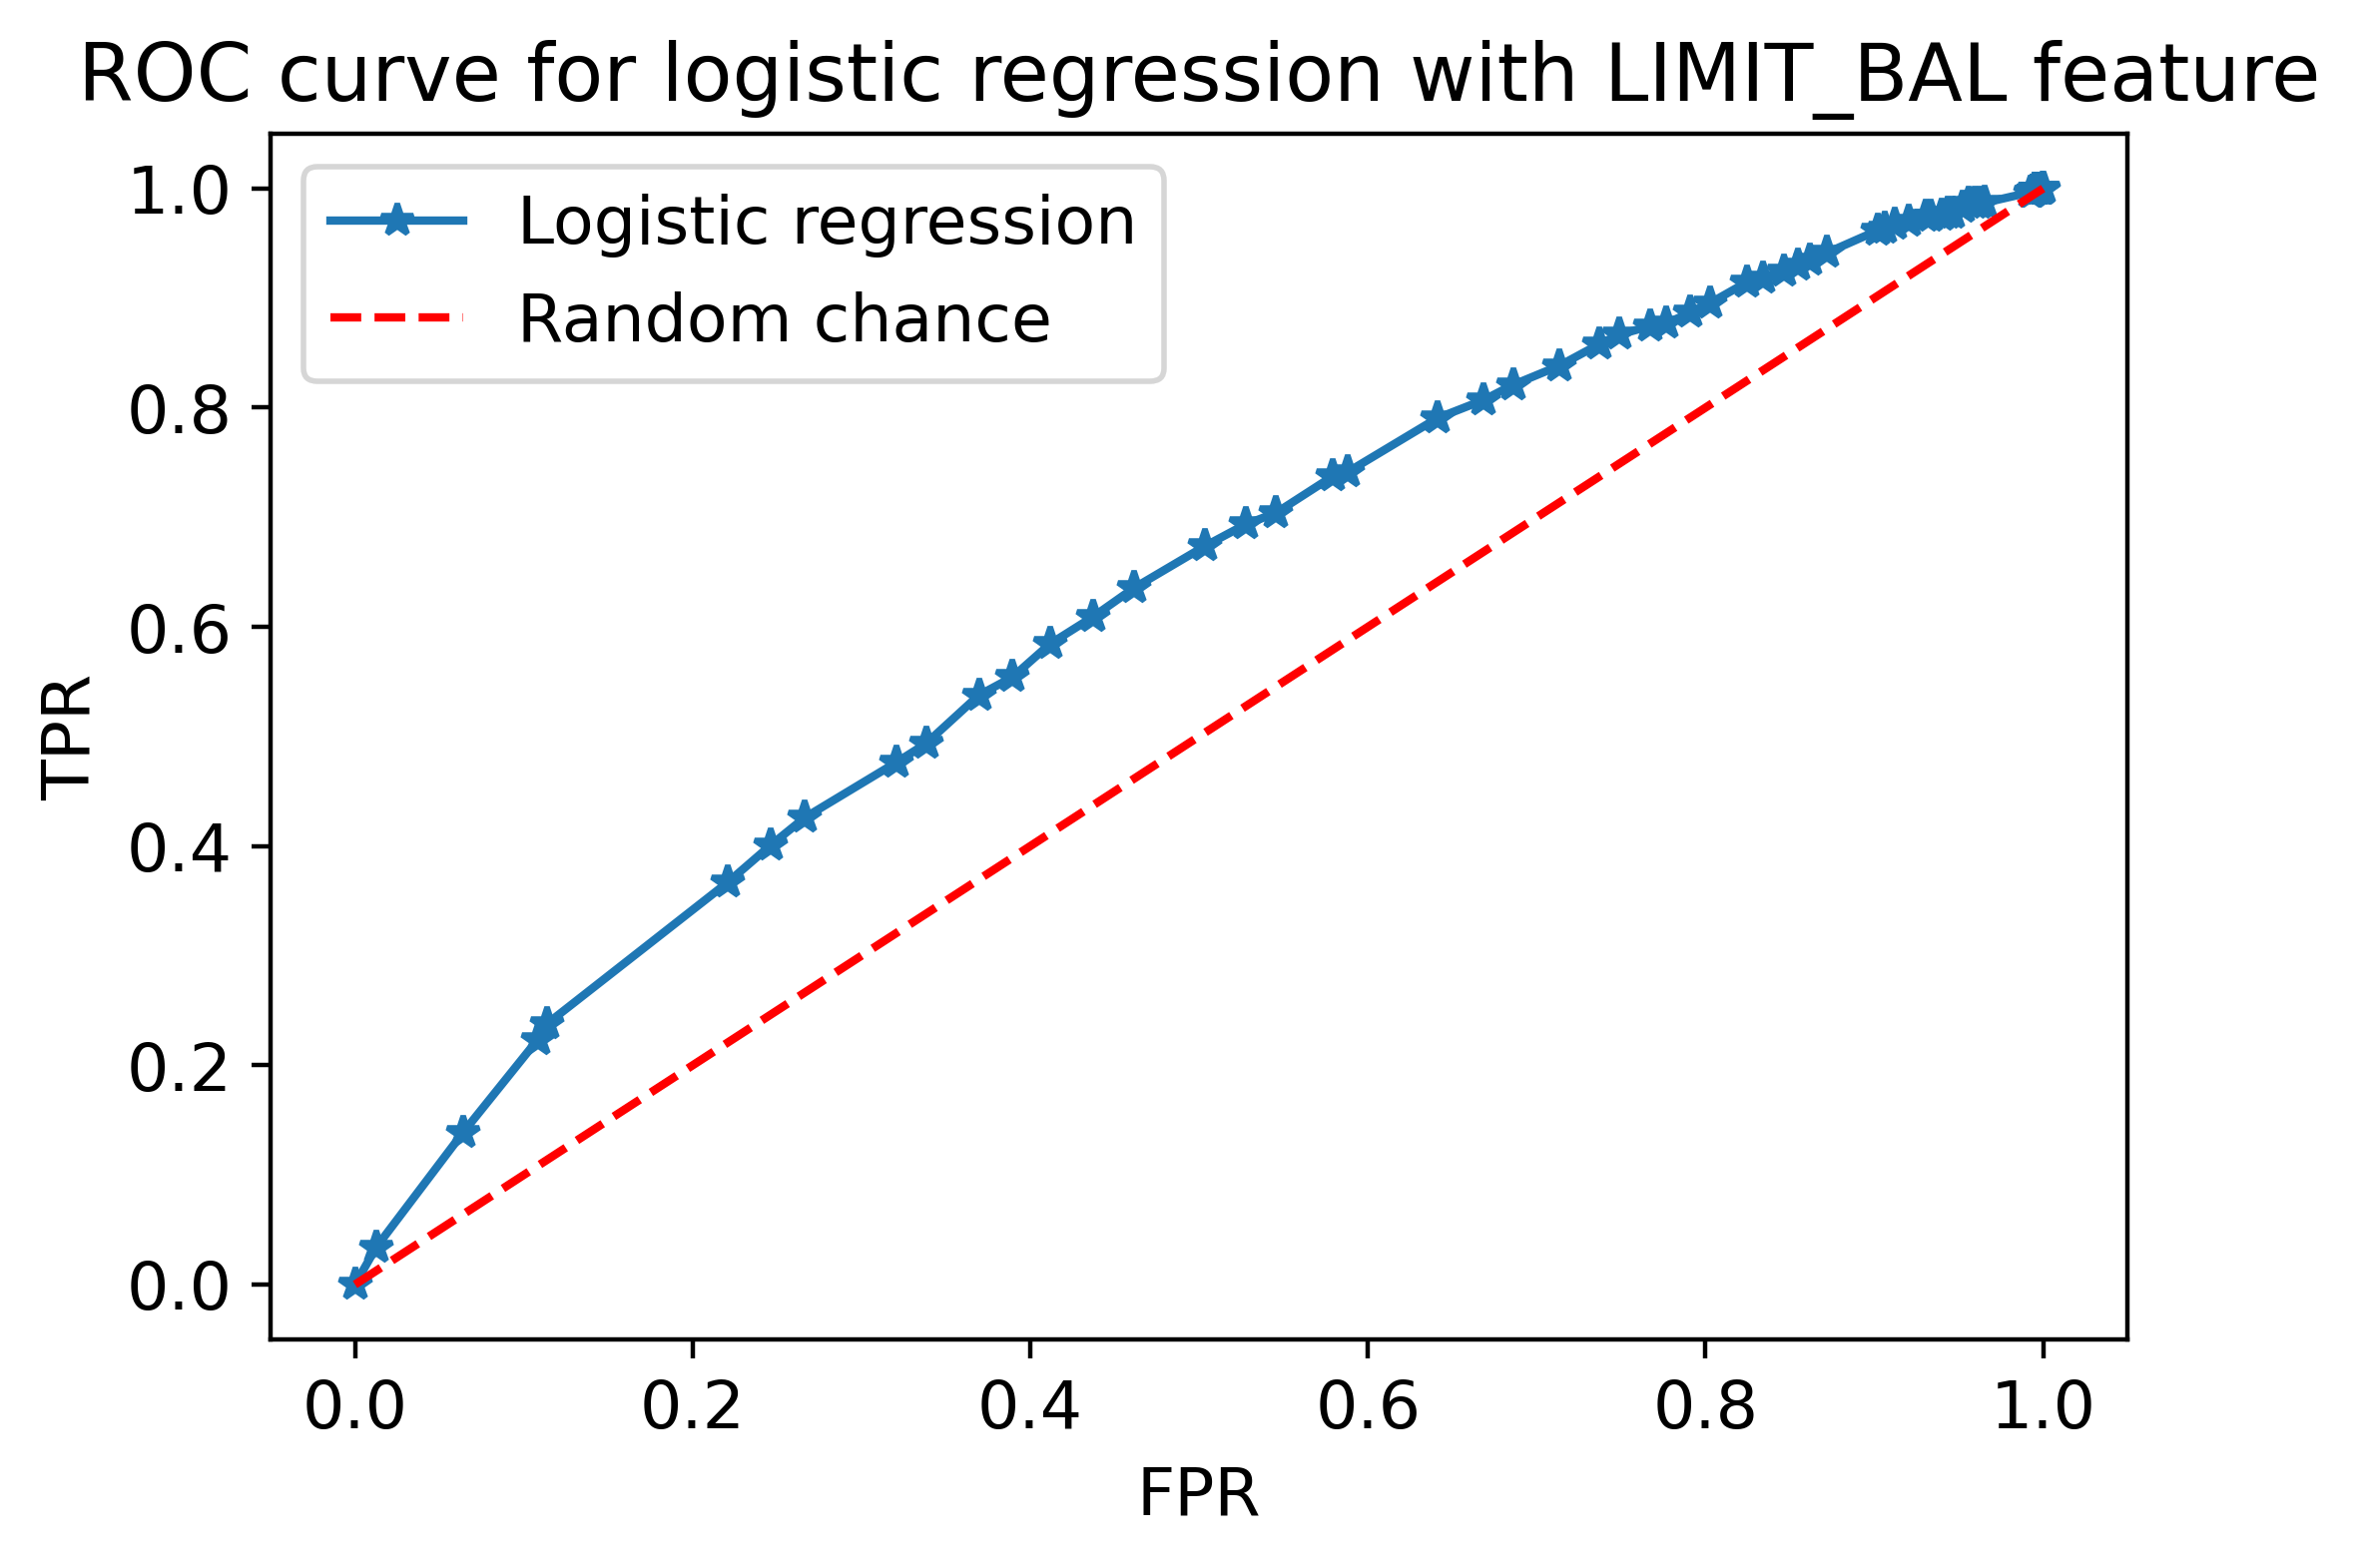

In [62]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [63]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

(0.0, 1.0)

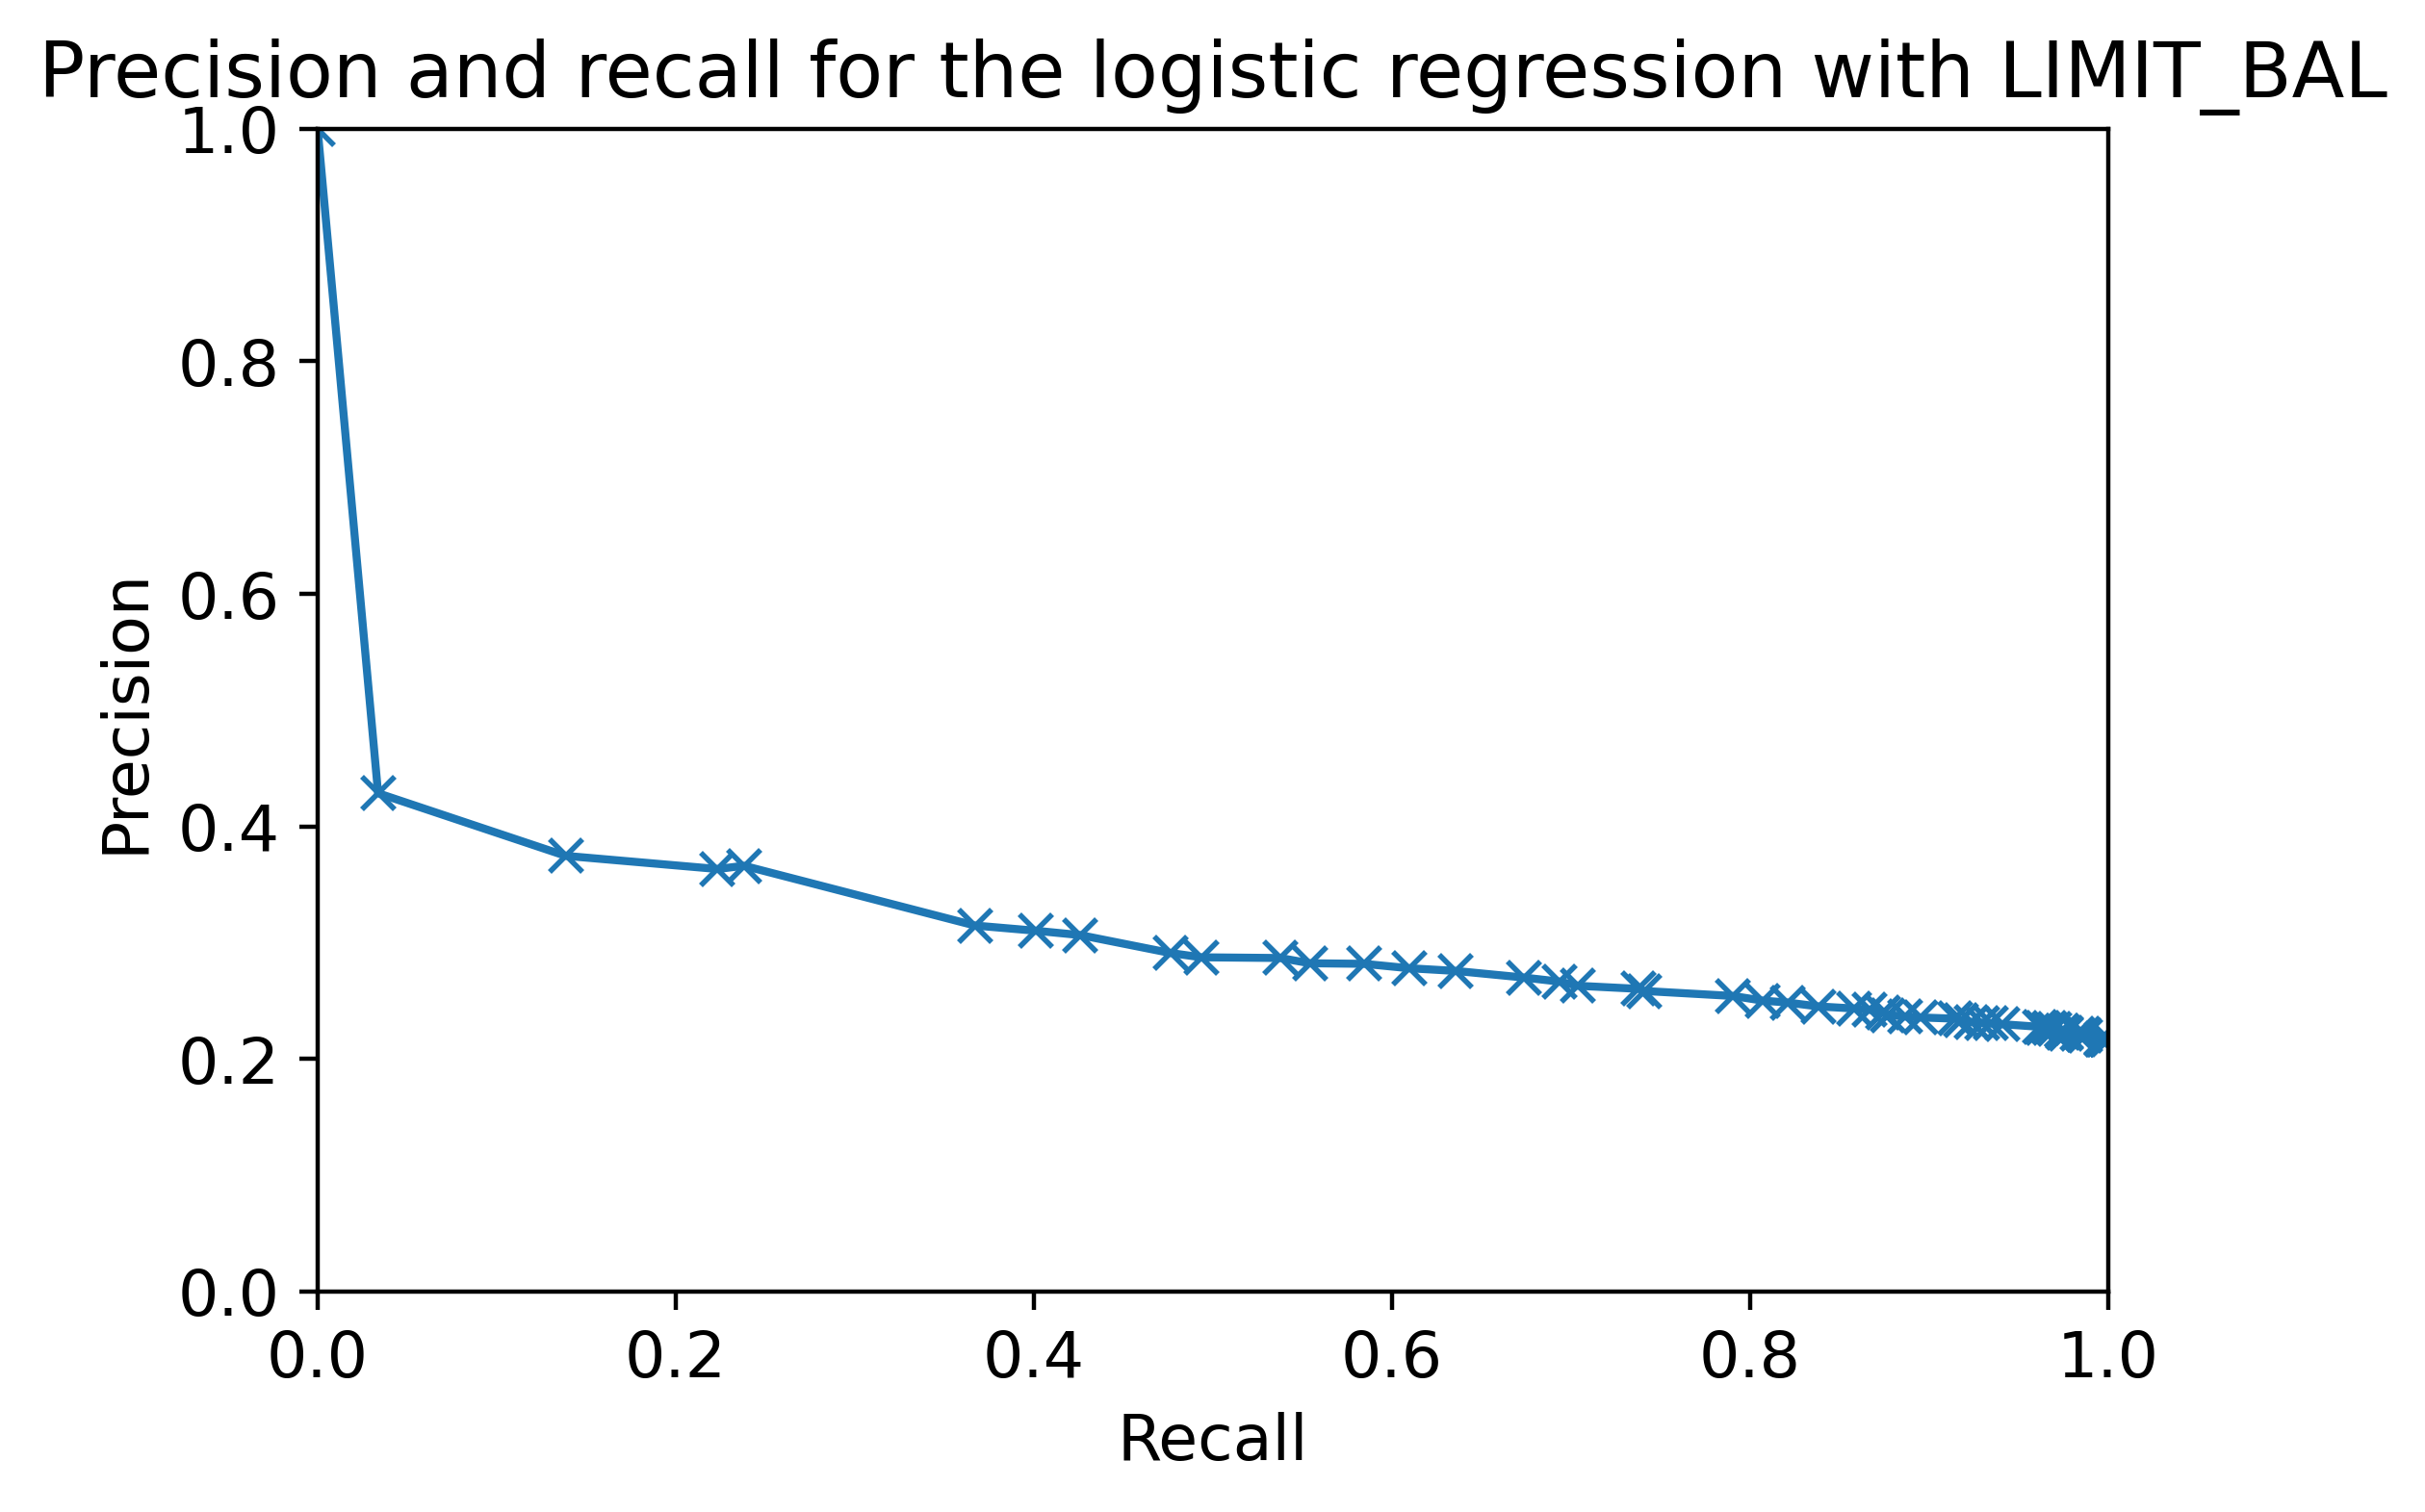

In [64]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [65]:
metrics.auc(recall, precision)

0.31566964427378624

In [66]:
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)

In [67]:
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

0.6182918113358344